### **Monte Carlo Methods in Bayesian Inference: Markov Chain Monte Carlo (MCMC)**

**Concept:**

MCMC methods are used to sample from probability distributions when direct sampling is challenging. They are essential in Bayesian statistics for estimating posterior distributions.

**Simulation Steps:**

1. **Define the Posterior Distribution:**

   - Based on the likelihood and prior.
   
2. **Set Up the Markov Chain:**

   - Use algorithms like Metropolis-Hastings or Gibbs sampling.
   
3. **Generate Samples:**

   - Iteratively sample from the distribution, building a chain.
   
4. **Analyze the Samples:**

   - Use the samples to estimate statistical properties (mean, variance, credible intervals).

In [1]:
import numpy as np
import pymc as pm
import matplotlib.pyplot as plt

In [2]:
# Generate synthetic data
np.random.seed(42)
X = np.linspace(0, 1, 100)
true_slope = 2.5
true_intercept = 0.5
Y = true_slope * X + true_intercept + np.random.normal(0, 0.2, size=X.shape)

In [3]:
# Bayesian linear regression using MCMC
with pm.Model() as model:
    # Priors
    slope = pm.Normal('slope', mu=0, sigma=10)
    intercept = pm.Normal('intercept', mu=0, sigma=10)
    sigma = pm.HalfNormal('sigma', sigma=1)

    # Likelihood
    mu = slope * X + intercept
    Y_obs = pm.Normal('Y_obs', mu=mu, sigma=sigma, observed=Y)

    # Sampling
    trace = pm.sample(2000, tune=1000, cores=2)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [slope, intercept, sigma]


/home/longview/anaconda3/envs/pymc_env/lib/python3.12/site-packages/rich/live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 2 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


<Figure size 1200x800 with 0 Axes>

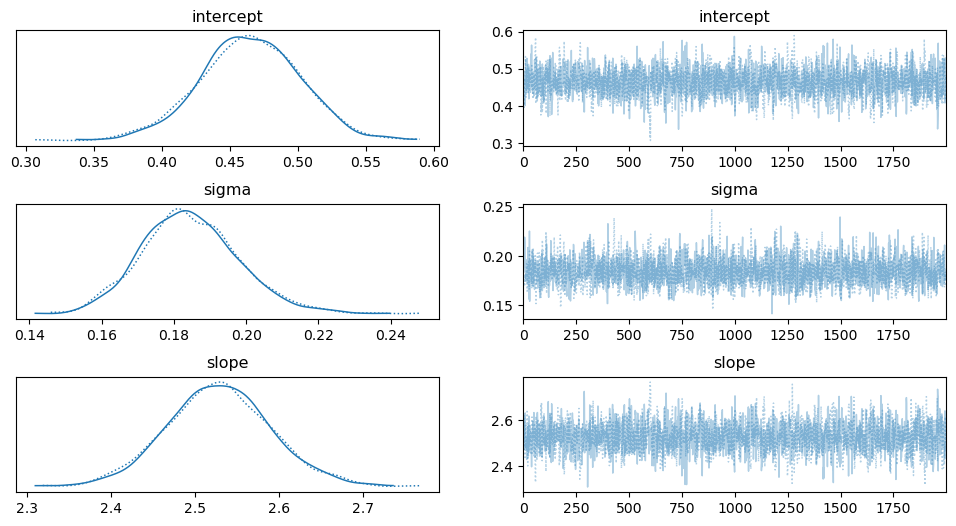

In [9]:
# Plot posterior distributions
plt.figure(figsize=(12, 8))
pm.plot_trace(trace)
plt.subplots_adjust(hspace=0.5, wspace=0.2)
plt.show()



**Explanation:**

- **Model Definition:** Specifies priors and likelihood for the Bayesian model.
- **Sampling:** Uses MCMC to sample from the posterior distribution.
- **Trace Plot:** Visualizes the sampled distributions for parameters.
- **Summary Statistics:** Provides estimates and credibility intervals.

**Benefits:**

- Enables inference when analytical solutions are intractable.
- Provides full posterior distributions, offering rich information about parameter uncertainty.
